<a href="https://colab.research.google.com/github/Rene-HN/Water_Consumption_Forecast/blob/main/Final_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Capstone: Project Proposal.


1. Problem

  In this project we will try to explore what is the best method to forecast the drinking water consumption of the City of New York.

  Although 71% of our planet is covered by water, only a very small proportion is associated with the continental areas to which humans are primarily confined. Over 99% of the water associated with continents is in the form of groundwater or ice and is therefore difficult for humans to use. Humans mostly depend on freshwater streams, rivers, marshes, lakes, and shallow groundwaters; we rely heavily on a rare commodity. Therefore, having the ability to forecast future water consumption would allow governments to manage such vital resources in a sustainable way. 

2. Data.

  For this project we will use a Kaggle dataset titled “NY Water Consumption In 
  The New York City”. The data collection provides a brief history of water  consumption in the New York City Water Supply System (Based on New York 
  City Census population)

  This is a dataset hosted by the City of New York. The city has an open data 
  platform found [here](https://opendata.cityofnewyork.us/) and they update their information according the amount of 
  data that is brought in. 

  One possible limitation of the dataset is that the observations are summarized in millions of gallons per day on a yearly average. Averaging on a yearly basis could eliminate some seasonal information that could be useful for model development and prediction.

3. Methodology.

  We will approach this project as a Time Series , therefore we will try to implement the ARIMA models from the statmodel library. Also we will try to evaluate a Bayesian model included on the Facebook open source library, Prophet.


In [ ]:
## Change your working directory to where the data
import os
os.chdir('/home/rene/Final Capstone/Data')

In [ ]:
import warnings
import pandas as pd
import numpy as np
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from scipy.stats import boxcox
from math import sqrt
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly

warnings.filterwarnings("ignore")

<ipython-input-2-db5ce83f9e94>:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
Importing plotly failed. Interactive plots will not work.


In [ ]:
%%time
timeseries_data = pd.read_csv( 'archive/water-consumption-in-the-new-york-city.csv' , header=0, index_col=0, parse_dates=True,  infer_datetime_format=True)
print(type(timeseries_data))
timeseries_data.head()

<class 'pandas.core.frame.DataFrame'>
CPU times: user 5.25 ms, sys: 555 µs, total: 5.81 ms
Wall time: 7.12 ms


,New York City Population,NYC Consumption(Million gallons per day),Per Capita(Gallons per person per day)
Year,,,
1979-01-01,7102100.0,1512.0,213
1980-01-01,7071639.0,1506.0,213
1981-01-01,7089241.0,1309.0,185
1982-01-01,7109105.0,1382.0,194
1983-01-01,7181224.0,1424.0,198


In [ ]:
%%time
timeseries_data.index = timeseries_data.index.year 

CPU times: user 133 µs, sys: 61 µs, total: 194 µs
Wall time: 157 µs


In [ ]:
%%time
timeseries_data.head()

CPU times: user 71 µs, sys: 32 µs, total: 103 µs
Wall time: 113 µs


,New York City Population,NYC Consumption(Million gallons per day),Per Capita(Gallons per person per day)
Year,,,
1979,7102100.0,1512.0,213
1980,7071639.0,1506.0,213
1981,7089241.0,1309.0,185
1982,7109105.0,1382.0,194
1983,7181224.0,1424.0,198


In [ ]:
%%time 
timeseries_data .describe().T

CPU times: user 6.83 ms, sys: 0 ns, total: 6.83 ms
Wall time: 7.07 ms


,count,mean,std,min,25%,50%,75%,max
New York City Population,41.0,7.808080e+06,468363.600789,7071639.0,7344175.0,7947660.0,8158447.5,8475976.0
NYC Consumption(Million gallons per day),41.0,1.222659e+03,177.967116,987.4,1039.0,1219.5,1369.0,1512.0
Per Capita(Gallons per person per day),41.0,1.584146e+02,32.242810,117.0,127.0,155.0,185.0,213.0


In [ ]:
%%time
timeseries_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 1979 to 2019
Data columns (total 3 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   New York City Population                  41 non-null     float64
 1   NYC Consumption(Million gallons per day)  41 non-null     float64
 2   Per Capita(Gallons per person per day)    41 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 1.3 KB
CPU times: user 3.52 ms, sys: 0 ns, total: 3.52 ms
Wall time: 4.01 ms


In [ ]:
%%time
nyc_pop = timeseries_data['New York City Population'].copy()
nyc_h2o_MMD = timeseries_data['NYC Consumption(Million gallons per day)'].copy()
nyc_h2o_PC = timeseries_data['Per Capita(Gallons per person per day)'].copy()

CPU times: user 327 µs, sys: 0 ns, total: 327 µs
Wall time: 257 µs


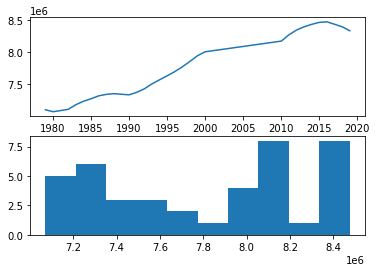

CPU times: user 168 ms, sys: 12.3 ms, total: 181 ms
Wall time: 189 ms


In [ ]:
%%time
pyplot.figure(1)
#line Plot
pyplot.subplot(211)
pyplot.plot(nyc_pop)
#Histogram
pyplot.subplot(212)
pyplot.hist(nyc_pop)
pyplot.show()

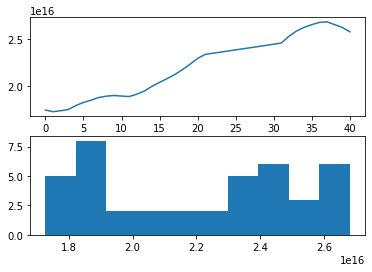

CPU times: user 156 ms, sys: 5.4 ms, total: 162 ms
Wall time: 152 ms


In [ ]:
%%time
pyplot.figure(1)
#line Plot
pyplot.subplot(211)
pyplot.plot(boxcox(nyc_pop, None)[0])
#Histogram
pyplot.subplot(212)
pyplot.hist(boxcox(nyc_pop, None)[0])
pyplot.show()

In [ ]:
%%time
boxcox(nyc_pop)

CPU times: user 503 µs, sys: 198 µs, total: 701 µs
Wall time: 704 µs


(array([1.74511286e+16, 1.72700436e+16, 1.73745488e+16, 1.74929291e+16,
        1.79267048e+16, 1.82512497e+16, 1.84942702e+16, 1.87743463e+16,
        1.89192776e+16, 1.89896577e+16, 1.89299033e+16, 1.88766224e+16,
        1.91201558e+16, 1.94645185e+16, 1.99591738e+16, 2.03765827e+16,
        2.07877769e+16, 2.12184559e+16, 2.17279223e+16, 2.23077338e+16,
        2.29286304e+16, 2.33553389e+16, 2.34736058e+16, 2.35922240e+16,
        2.37111939e+16, 2.38305158e+16, 2.39501901e+16, 2.40702169e+16,
        2.41905966e+16, 2.43113296e+16, 2.44324162e+16, 2.45538565e+16,
        2.52730184e+16, 2.58331553e+16, 2.62156033e+16, 2.65093200e+16,
        2.67447264e+16, 2.68045098e+16, 2.65160607e+16, 2.62156714e+16,
        2.57490143e+16]),
 2.426786820372914)

Running the box-cox method  we can discover the lambda value of 2.4268. We can see that this is very
close to a lambda value of 2.0, resulting in a square transform and stronger (less than) than 3.0 for
the cubic transform.

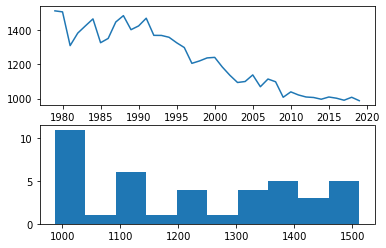

CPU times: user 136 ms, sys: 1.32 ms, total: 138 ms
Wall time: 133 ms


In [ ]:
%%time
pyplot.figure(1)
#line Plot
pyplot.subplot(211)
pyplot.plot(nyc_h2o_MMD)
#Histogram
pyplot.subplot(212)
pyplot.hist(nyc_h2o_MMD)
pyplot.show()

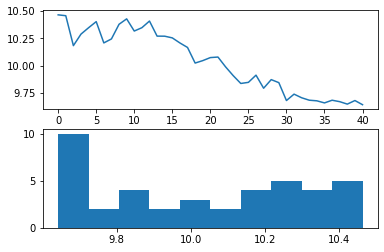

CPU times: user 158 ms, sys: 5.77 ms, total: 164 ms
Wall time: 155 ms


In [ ]:
%%time
pyplot.figure(1)
#line Plot
pyplot.subplot(211)
pyplot.plot(boxcox(nyc_h2o_MMD, None)[0])
#Histogram
pyplot.subplot(212)
pyplot.hist(boxcox(nyc_h2o_MMD, None)[0])
pyplot.show()

In [ ]:
%%time
boxcox(nyc_h2o_MMD)

CPU times: user 2.5 ms, sys: 0 ns, total: 2.5 ms
Wall time: 2.51 ms


(array([10.46401861, 10.45620011, 10.18235836, 10.28794057, 10.34641393,
        10.40200428, 10.20741479, 10.24373786, 10.37777492, 10.42728833,
        10.31598327, 10.34641393, 10.40735187, 10.26951463, 10.26880278,
        10.25336877, 10.20697515, 10.16583813, 10.02311231, 10.0453625 ,
        10.07316361, 10.07815123,  9.98848145,  9.90838425,  9.8365011 ,
         9.84659904,  9.91242837,  9.79294615,  9.87163394,  9.84399215,
         9.68039713,  9.73879987,  9.70562698,  9.68340331,  9.67776317,
         9.65866185,  9.68321555,  9.67003025,  9.64761316,  9.68039713,
         9.64225827]),
 0.09238417091148361)

Running the box-cox method  we can discover the lambda value of 0.09238. We can see that this is very
close to a lambda value of 0.0, resulting in a square transform and weaker (more than) than 0.5 for
the square root transform.

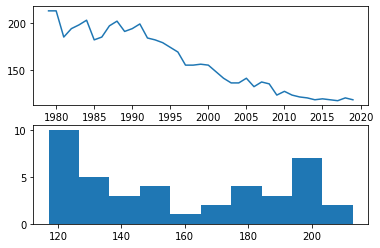

CPU times: user 163 ms, sys: 4.43 ms, total: 167 ms
Wall time: 164 ms


In [ ]:
%%time
pyplot.figure(1)
#line Plot
pyplot.subplot(211)
pyplot.plot(nyc_h2o_PC)
#Histogram
pyplot.subplot(212)
pyplot.hist(nyc_h2o_PC)
pyplot.show()

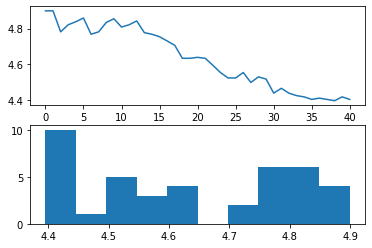

CPU times: user 141 ms, sys: 3.97 ms, total: 145 ms
Wall time: 140 ms


In [ ]:
%%time
pyplot.figure(1)
#line Plot
pyplot.subplot(211)
pyplot.plot(boxcox(nyc_h2o_PC)[0])
#Histogram
pyplot.subplot(212)
pyplot.hist(boxcox(nyc_h2o_PC)[0])
pyplot.show()

In [ ]:
%%time
boxcox(nyc_h2o_PC)

CPU times: user 3.94 ms, sys: 0 ns, total: 3.94 ms
Wall time: 2.54 ms


(array([4.89941928, 4.89941928, 4.78176523, 4.82148355, 4.83852834,
        4.85934038, 4.76808026, 4.78176523, 4.83430075, 4.8552207 ,
        4.80845972, 4.82148355, 4.84273391, 4.77722923, 4.76808026,
        4.75416   , 4.73041452, 4.70595268, 4.63325959, 4.63325959,
        4.63867304, 4.63325959, 4.59432323, 4.55343395, 4.52292071,
        4.52292071, 4.55343395, 4.49766282, 4.52911517, 4.51667897,
        4.43781242, 4.46495352, 4.43781242, 4.42389756, 4.41685067,
        4.40257287, 4.40974279, 4.40257287, 4.39533984, 4.41685067,
        4.40257287]),
 -0.03412714546809122)

Running the box-cox method  we can discover the lambda value of -0.03413. We can see that this is very
close to a lambda value of 0.0, resulting in a square transform and weaker (more than) than -0.5 for
the reciprocal square root transform.

The dataset is non-stationary, meaning that the mean and the variance of the observations
change over time. This makes it difficult to model.
Also, the amount of change, or the variance, is decreasing with time.

CPU times: user 50.5 ms, sys: 4.64 ms, total: 55.2 ms
Wall time: 39.6 ms


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

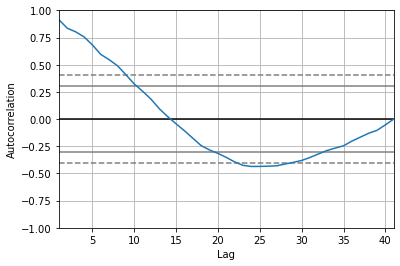

In [ ]:
%%time
autocorrelation_plot(nyc_h2o_PC)

From the above plot we can determine that there is a strong positive autocorrelation when lags are less than 10, and strong negative autocorrelation when the lag is similar to 25.

Whe can conclude that our series is not white noise.

CPU times: user 28.4 ms, sys: 6.61 ms, total: 35 ms
Wall time: 20.7 ms


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

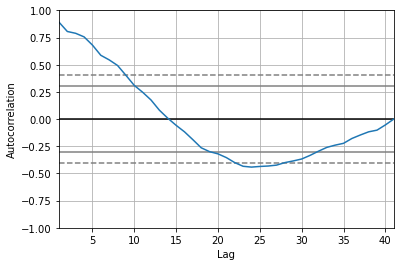

In [ ]:
%%time
autocorrelation_plot(nyc_h2o_MMD)

From the above plot we can determine that there is a strong positive autocorrelation when lags are less than 10, and strong negative autocorrelation when the lag is similar to 25.

Whe can conclude that our series is not white noise.

CPU times: user 20.4 ms, sys: 2.63 ms, total: 23.1 ms
Wall time: 15.2 ms


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

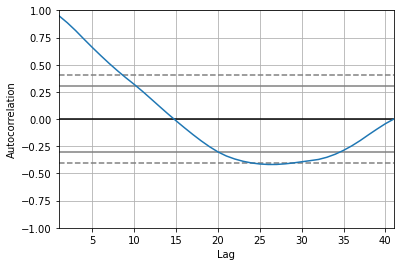

In [ ]:
%%time
autocorrelation_plot(nyc_pop)

From the above plot we can determine that there is a strong positive autocorrelation when lags are less than 10, and strong negative autocorrelation when the lag is similar to 25.

Whe can conclude that our series is not white noise.

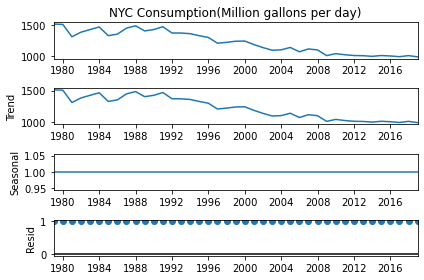

CPU times: user 453 ms, sys: 91.4 ms, total: 544 ms
Wall time: 352 ms


In [ ]:
%%time
from statsmodels.tsa.seasonal import seasonal_decompose
timeseries_data = pd.read_csv( 'archive/water-consumption-in-the-new-york-city.csv' , header=0, index_col=0, parse_dates=True,  infer_datetime_format=True)

result = seasonal_decompose(timeseries_data['NYC Consumption(Million gallons per day)'], model= 'multiplicative' )
result.plot()
pyplot.show()

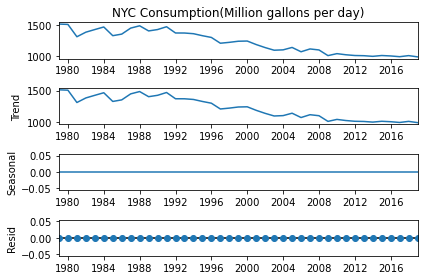

CPU times: user 464 ms, sys: 117 ms, total: 580 ms
Wall time: 363 ms


In [ ]:
%%time
result = seasonal_decompose(timeseries_data['NYC Consumption(Million gallons per day)'], model= 'additive' )
result.plot()
pyplot.show()

We can see that the entire series was taken as the trend component and that there was
no seasonality.

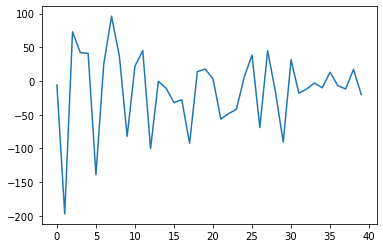

CPU times: user 90.4 ms, sys: 4.23 ms, total: 94.6 ms
Wall time: 89 ms


In [ ]:
%%time
X = timeseries_data['NYC Consumption(Million gallons per day)'].values
diff = list()
for i in range(1, len(X)):
    value = X[i] - X[i - 1]
    diff.append(value)
pyplot.plot(diff)
pyplot.show()

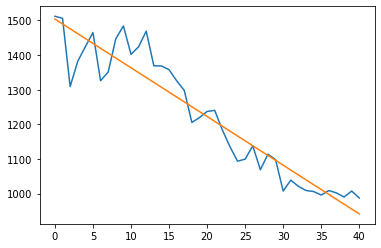

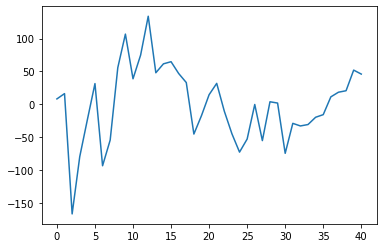

CPU times: user 220 ms, sys: 6.39 ms, total: 227 ms
Wall time: 269 ms


In [ ]:
%%time
from sklearn.linear_model import LinearRegression

# fit linear model
X = [i for i in range(0, len(timeseries_data['NYC Consumption(Million gallons per day)']))]
X = np.reshape(X, (len(X), 1))
y = timeseries_data['NYC Consumption(Million gallons per day)'].values
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
# plot trend
pyplot.plot(y)
pyplot.plot(trend)
pyplot.show()
# detrend
detrended = [y[i]-trend[i] for i in range(0, len(timeseries_data['NYC Consumption(Million gallons per day)']))]
# plot detrended
pyplot.plot(detrended)
pyplot.show()

* This approach has effectively detrended the dataset. 
* There might be an exponential function in the residuals , suggesting that perhaps a polynomial fit may have done a better job.

In [ ]:
%%time
from statsmodels.tsa.stattools import adfuller
X = timeseries_data['NYC Consumption(Million gallons per day)'].values
result = adfuller(X)
print( 'ADF Statistic: %f' % result[0])
print( 'p-value: %f' % result[1])
print( 'Critical Values:' )
for key, value in result[4].items():
    print( '\t%s: %.3f' % (key, value))

ADF Statistic: -0.080603
p-value: 0.951337
Critical Values:
	1%: -3.616
	5%: -2.941
	10%: -2.609
CPU times: user 7.28 ms, sys: 928 µs, total: 8.21 ms
Wall time: 19.9 ms


* The test statistic is negative , and it looks stationary.
* Comparing the test statistic to the critical values, it looks like we can reject the null hypothesis with a significance level of less than 1%.



In [ ]:
%%time
# evaluate a persistence model
# prepare data
X = timeseries_data['NYC Consumption(Million gallons per day)'].values
X = X.astype( 'float32' )
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
# predict
    yhat = history[-1]
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print( ' >Predicted=%.3f, Expected=%.3f ' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print( ' RMSE: %.3f ' % rmse)

 >Predicted=1219.500, Expected=1237.200 
 >Predicted=1237.200, Expected=1240.400 
 >Predicted=1240.400, Expected=1184.000 
 >Predicted=1184.000, Expected=1135.600 
 >Predicted=1135.600, Expected=1093.700 
 >Predicted=1093.700, Expected=1099.500 
 >Predicted=1099.500, Expected=1138.000 
 >Predicted=1138.000, Expected=1069.000 
 >Predicted=1069.000, Expected=1114.000 
 >Predicted=1114.000, Expected=1098.000 
 >Predicted=1098.000, Expected=1007.500 
 >Predicted=1007.500, Expected=1039.000 
 >Predicted=1039.000, Expected=1021.000 
 >Predicted=1021.000, Expected=1009.100 
 >Predicted=1009.100, Expected=1006.100 
 >Predicted=1006.100, Expected=996.000 
 >Predicted=996.000, Expected=1009.000 
 >Predicted=1009.000, Expected=1002.000 
 >Predicted=1002.000, Expected=990.200 
 >Predicted=990.200, Expected=1007.500 
 >Predicted=1007.500, Expected=987.400 
 RMSE: 35.844 
CPU times: user 1.59 ms, sys: 0 ns, total: 1.59 ms
Wall time: 1.14 ms


In [ ]:
# grid search ARIMA parameters for time series
from math import sqrt
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.88)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
        
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse   

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype( 'float32' )
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print( ' ARIMA%s RMSE=%.3f ' % (order,rmse))
                except:
                    continue
    print( ' Best ARIMA%s RMSE=%.3f ' % (best_cfg, best_score))

In [ ]:
%%time
series = timeseries_data['NYC Consumption(Million gallons per day)'].values
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)

evaluate_models(series, p_values, d_values, q_values)

 ARIMA(0, 0, 0) RMSE=241.742 
 ARIMA(0, 0, 1) RMSE=131.010 
 ARIMA(0, 0, 2) RMSE=95.330 
 ARIMA(0, 1, 0) RMSE=19.165 
 ARIMA(0, 1, 1) RMSE=26.420 
 ARIMA(0, 1, 2) RMSE=27.072 
 ARIMA(0, 2, 0) RMSE=25.632 
 ARIMA(0, 2, 1) RMSE=18.609 
 ARIMA(0, 2, 2) RMSE=27.862 
 ARIMA(1, 0, 0) RMSE=18.885 
 ARIMA(1, 0, 1) RMSE=14.618 
 ARIMA(1, 1, 0) RMSE=20.034 
 ARIMA(1, 1, 1) RMSE=27.993 
 ARIMA(1, 1, 2) RMSE=28.350 
 ARIMA(1, 2, 0) RMSE=19.933 
 ARIMA(2, 0, 0) RMSE=16.669 
 ARIMA(2, 1, 0) RMSE=22.988 
 ARIMA(2, 1, 1) RMSE=25.989 
 ARIMA(2, 1, 2) RMSE=20.032 
 ARIMA(2, 2, 0) RMSE=16.162 
 ARIMA(4, 0, 0) RMSE=13.274 
 ARIMA(4, 1, 0) RMSE=25.666 
 ARIMA(4, 1, 1) RMSE=24.409 
 ARIMA(4, 1, 2) RMSE=19.852 
 ARIMA(4, 2, 0) RMSE=13.474 
 ARIMA(4, 2, 1) RMSE=34.033 
 ARIMA(6, 0, 0) RMSE=14.783 
 ARIMA(6, 1, 0) RMSE=21.729 
 ARIMA(6, 1, 1) RMSE=22.051 
 ARIMA(6, 2, 1) RMSE=24.938 
 ARIMA(8, 0, 0) RMSE=15.662 
 ARIMA(8, 1, 0) RMSE=21.097 
 ARIMA(8, 1, 1) RMSE=23.192 
 ARIMA(10, 0, 2) RMSE=36.633 
 ARIMA(10, 

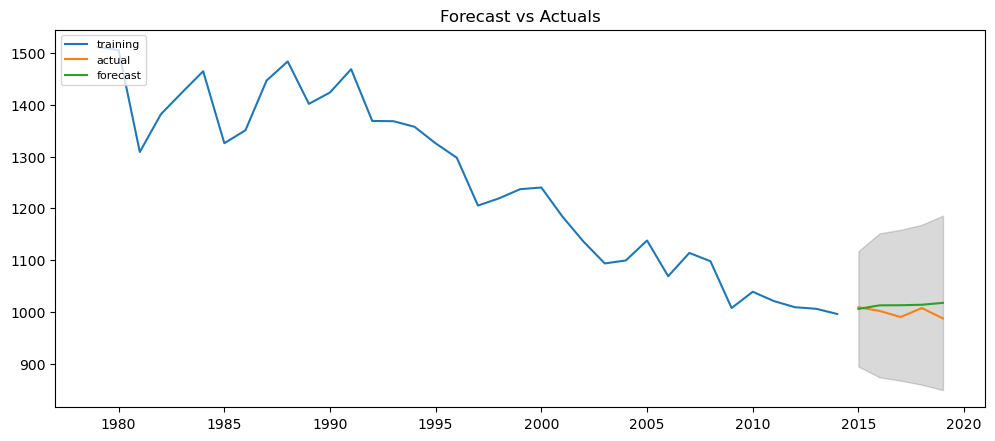

In [ ]:
X = timeseries_data['NYC Consumption(Million gallons per day)'].copy()
train_size = int(len(X) * 0.88)
train, test = X[0:train_size], X[train_size:]
    
model = ARIMA(train, order=(4, 0, 0))  
fitted = model.fit(disp=0)  

# Forecast
fc, se, conf = fitted.forecast(5, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
pyplot.figure(figsize=(12,5), dpi=100)
pyplot.plot(train, label='training')
pyplot.plot(test, label='actual')
pyplot.plot(fc_series, label='forecast')
pyplot.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
pyplot.title('Forecast vs Actuals')
pyplot.legend(loc='upper left', fontsize=8)
pyplot.show()

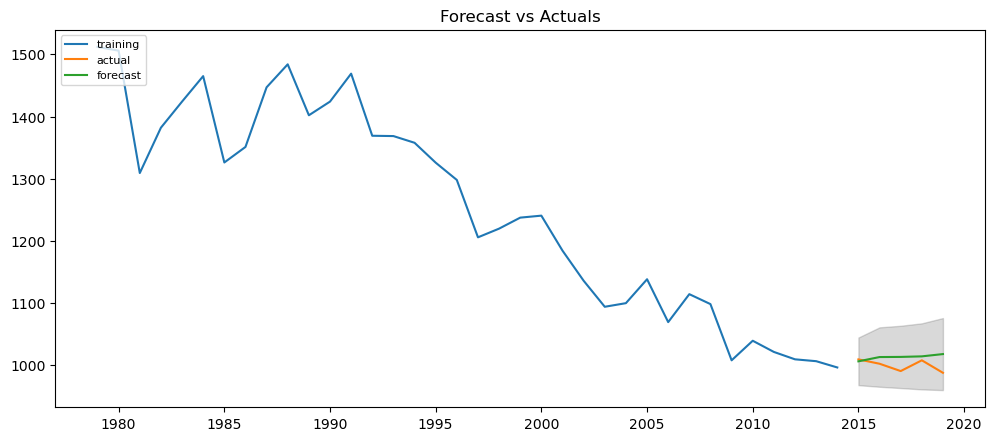

In [ ]:
X = timeseries_data['NYC Consumption(Million gallons per day)'].copy()
train_size = int(len(X) * 0.88)
train, test = X[0:train_size], X[train_size:]
    
model = ARIMA(train, order=(4, 0, 0))  
fitted = model.fit(disp=0)  

# Forecast
fc, se, conf = fitted.forecast(5, alpha=0.5)  # 50% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
pyplot.figure(figsize=(12,5), dpi=100)
pyplot.plot(train, label='training')
pyplot.plot(test, label='actual')
pyplot.plot(fc_series, label='forecast')
pyplot.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
pyplot.title('Forecast vs Actuals')
pyplot.legend(loc='upper left', fontsize=8)
pyplot.show()

In [ ]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt

df = pd.read_csv('archive/water-consumption-in-the-new-york-city.csv' , header=0, index_col=0, parse_dates=True,  infer_datetime_format=True)
df

,New York City Population,NYC Consumption(Million gallons per day),Per Capita(Gallons per person per day)
Year,,,
1979-01-01,7102100.0,1512.0,213
1980-01-01,7071639.0,1506.0,213
1981-01-01,7089241.0,1309.0,185
1982-01-01,7109105.0,1382.0,194
1983-01-01,7181224.0,1424.0,198
1984-01-01,7234514.0,1465.0,203
1985-01-01,7274054.0,1326.0,182
1986-01-01,7319246.0,1351.0,185
1987-01-01,7342476.0,1447.0,197


In [ ]:
df_MMgpd = pd.DataFrame()

In [ ]:
df_MMgpd['ds'] = pd.DatetimeIndex(df.index)
df_MMgpd['y']  = df['NYC Consumption(Million gallons per day)'].values

In [ ]:
df_MMgpd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      41 non-null     datetime64[ns]
 1   y       41 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 784.0 bytes


In [ ]:

df_MMgpd

,ds,y
0,1979-01-01,1512.0
1,1980-01-01,1506.0
2,1981-01-01,1309.0
3,1982-01-01,1382.0
4,1983-01-01,1424.0
5,1984-01-01,1465.0
6,1985-01-01,1326.0
7,1986-01-01,1351.0
8,1987-01-01,1447.0
9,1988-01-01,1484.0


In [ ]:
my_model = Prophet(interval_width=1)

In [ ]:
my_model.fit(df_MMgpd)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_dates = my_model.make_future_dataframe(periods=10, freq='Y')
future_dates

,ds
0,1979-01-01
1,1980-01-01
2,1981-01-01
3,1982-01-01
4,1983-01-01
5,1984-01-01
6,1985-01-01
7,1986-01-01
8,1987-01-01
9,1988-01-01


In [ ]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
46,2024-12-31,869.678822,718.030012,1032.906827
47,2025-12-31,852.161832,690.359365,985.588965
48,2026-12-31,827.776109,646.244714,978.002985
49,2027-12-31,796.541571,630.435046,958.694696
50,2028-12-31,810.013158,667.998208,958.627487


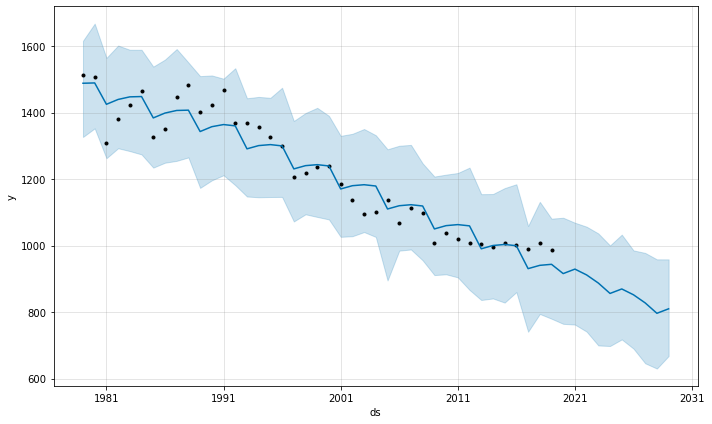

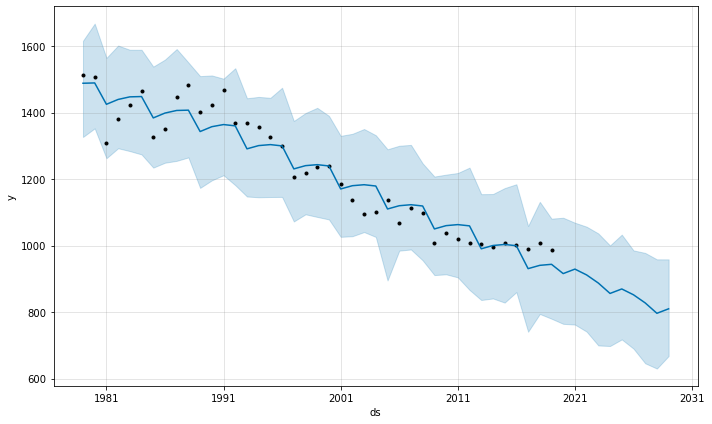

In [ ]:
my_model.plot(forecast,
              uncertainty=True)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# calculate out of sample error
rmse = sqrt(mean_squared_error(df_MMgpd.y, forecast.iloc[:41]['yhat']))

rmse

49.04293182687258

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 54 forecasts with cutoffs between 1982-07-02 03:16:12 and 2017-12-31 18:10:48


  0%|          | 0/54 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 2.
INFO:fbprophet:n_changepoints greater than number of observations. Using 2.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.
INFO:fbprophet:n_changepoints greater than number of observations. Using 5.
INFO:fbprophet:n_changepoints greater than number of observations. Using 5.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.
INFO:fbproph

,horizon,mse,rmse,mae,mape,mdape,coverage
0,0 days 05:49:12,3364.467561,58.004031,48.878191,0.041494,0.040740,0.500000
1,0 days 11:38:24,3120.747869,55.863654,49.177812,0.042501,0.034115,0.555556
2,0 days 17:27:36,4828.989474,69.490931,64.228497,0.053749,0.051008,0.250000
3,182 days 20:43:48,3364.467561,58.004031,48.878191,0.041494,0.040740,0.500000
4,183 days 02:33:00,3120.747869,55.863654,49.177812,0.042501,0.034115,0.555556


,horizon,mse,rmse,mae,mape,mdape,coverage
2,0 days 17:27:36,4828.989474,69.490931,64.228497,0.053749,0.051008,0.250000
3,182 days 20:43:48,3364.467561,58.004031,48.878191,0.041494,0.040740,0.500000
4,183 days 02:33:00,3120.747869,55.863654,49.177812,0.042501,0.034115,0.555556
5,183 days 08:22:12,4828.989474,69.490931,64.228497,0.053749,0.051008,0.250000
6,365 days 05:49:12,7773.088397,88.165120,68.239883,0.055179,0.048479,0.500000


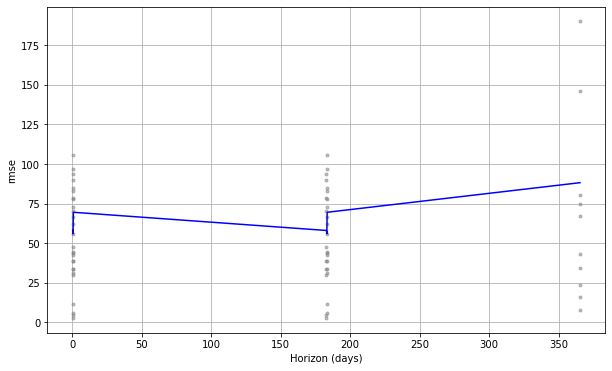

In [ ]:
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import add_changepoints_to_plot, plot_cross_validation_metric

m = Prophet()
m.fit(df_MMgpd)

# Execute cross validation
df_cv = cross_validation(m, horizon = '1 y')
pm = performance_metrics(df_cv, rolling_window=0.1)
display(pm.head(),pm.tail())
fig = plot_cross_validation_metric(df_cv, metric='rmse', rolling_window=0.1)
plt.show()

In [ ]:
pm.describe()

,horizon,mse,rmse,mae,mape,mdape,coverage
count,7,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,130 days 20:37:37.714285714,4343.071172,64.983193,56.115555,0.047238,0.042886,0.444444
std,137 days 21:52:24.950689774,1690.203633,11.844764,8.941126,0.006567,0.007374,0.135134
min,0 days 05:49:12,3120.747869,55.863654,48.878191,0.041494,0.034115,0.250000
25%,0 days 14:33:00,3242.607715,56.933842,49.028002,0.041997,0.037428,0.375000
50%,182 days 20:43:48,3364.467561,58.004031,49.177812,0.042501,0.040740,0.500000
75%,183 days 05:27:36,4828.989474,69.490931,64.228497,0.053749,0.049743,0.527778
max,365 days 05:49:12,7773.088397,88.165120,68.239883,0.055179,0.051008,0.555556


In [ ]:
import itertools


from dask.distributed import Client, LocalCluster
cluster = LocalCluster(n_workers=4, threads_per_worker=3)
client = Client(cluster)
client

param_grid = {  
    'changepoint_prior_scale': [ 0.5, 1.0, 1.5],
    'seasonality_prior_scale': [10.0, 15.0, 20.0],
    'changepoint_range':[0.8, 0.90]
}

# Generate all combinations of parametersClick on a function to see documentation.
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df_MMgpd)  # Fit model with given params
    df_cv = cross_validation(m, horizon='1 y', parallel="dask")
    df_p = performance_metrics(df_cv, rolling_window=0.1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 54 forecasts with cutoffs between 1982-07-02 03:16:12 and 2017-12-31 18:10:48
INFO:fbprophet:Applying in parallel with <Client: 'tcp://127.0.0.1:44555' processes=4 threads=12, memory=33.52 GB>
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Making 54 forecasts with cutoffs between 1982-07-02 03:16:12 and 2017-12-31 18:10:48
INFO:fbprophet:Applying in parallel with <Client: 'tcp://127.0.0.1:44555' processes=4 threads=12, memory=33.52 GB>
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophe

    changepoint_prior_scale  seasonality_prior_scale  changepoint_range  \
0                       0.5                     10.0                0.8   
1                       0.5                     10.0                0.9   
2                       0.5                     15.0                0.8   
3                       0.5                     15.0                0.9   
4                       0.5                     20.0                0.8   
5                       0.5                     20.0                0.9   
6                       1.0                     10.0                0.8   
7                       1.0                     10.0                0.9   
8                       1.0                     15.0                0.8   
9                       1.0                     15.0                0.9   
10                      1.0                     20.0                0.8   
11                      1.0                     20.0                0.9   
12                      1

Although we improved our Prophet's rmse from 49 to 35, our ARIMA(4,0,0) still outperformed all other models with an rmse of 13.